In [2]:
import numpy as np
from scipy import optimize
from sympy import *
from scipy.integrate import odeint
from numpy import linalg as LA
import matplotlib.pyplot as plt


This script describes an analytical approach to understand whether a system in a non-growing field generates spatial periodic heterogeneities (Turing patterns). This approach consists in studying the stability of a steady state and the dispersion relation when diffusion is introduced. If introduction of diffusion turns a stable steady state into an unstable one, this is called a diffusion-driven instability which is the base of Turing patterns. 

An introductory explanation of this method can be found in http://webhome.phy.duke.edu/~hsg/414/files/lectures/linear-stability-notes.pdf. It can also be found in Section 2.2 of the PhD Thesis.

This method consists of various steps.
1. Find steady states
2. Analyse their stability using linear stability analysis
3. Analyse their stability when diffusion is introduced through the dispersion relation


The system used as an example is a reaction-diffusion model.


$$\frac{\partial u}{\partial t} = a-u+u^2v +  D_u \frac{\partial^2 u}{\partial x^2} ,$$

$$\frac{\partial v}{\partial t} = b-u^2v + +  D_v \frac{\partial^2 v}{\partial x^2} $$ 





### 1. Find steady states

This method has been explained in the previous notebook found in the steady_states directory. 

The steady states obtained are  [1.1, 0.9091]

In [3]:
a = 0
b =1.1
Ustar = [a+b, b/(a+b)**2] #analytical steady state
#steady state can also be found using the newton-raphson method or solving the ODEs
print('Steady state')
print(Ustar)

Steady state
[1.1, 0.9090909090909091]


### Function and jacobian definition

The jacobian can be obtain through the linearisation of the reaction and diffusion terms as seen in Section2.2. of the PhD thesis


In [13]:
#Equations defining the schnakenberg system (a system of equations producing Turing patterns under certain parameters). 
def PDE(u):
    a,b = symbols('a'),symbols('b')
    f_u0 = a - u[0] + (u[0]**2)*u[1]
    f_u1 = b - (u[0]**2)*u[1]
    return f_u0,f_u1
    
#Jacobian matrix of the schnakenberg reaction diffusion system.
#This jacobian can be obtain through the linearisation of the reaction and diffusion terms as seen in Section2.2. of the thesis
def PDE_jacobian(wvn, diffusionConstants):
    u = Ustar
    d_A, d_B = diffusionConstants
    Ju0 = [2*u[0]*u[1] - 1 - d_A * wvn ** 2, u[0]**2]
    Ju1 = [-2*u[0]*u[1], -u[0]**2 - d_B * wvn ** 2]
    return Ju0, Ju1


### 2. Calculate dispersion relation (with and without diffusion)

In [10]:
def calculate_dispersion(jac,x, diffusionConstants, top_dispersion,n_species=2):

    # - Define which wavenumbers will be analysed. L = 100 in this case (100mm) (The experimental system is a 10cm plate)
    # so wavelengths bigger than that are of no interest.
    # - In this case we will sample 5000+1 different wavenumbers. If you sample less you might not find your turing instability.
    # If you sample more, is more computationally expensive.

    wvn_list = np.array(list(range(0,top_dispersion+1)))*np.pi/100
    count = 0
    eigenvalues = np.zeros((len(wvn_list),n_species) ,dtype=np.complex_)
    
    for wvn in wvn_list:
        eigenval, eigenvec = LA.eig(jac(wvn, diffusionConstants)) #calculate the eigenvalues of the jacobian with diffusion
        # sort eigenvalues so the one with the instability is at position -1.
        idx = np.argsort(eigenval) #np.argsort
        eigenval= eigenval[idx] #orders eigenvalues for each k.
        eigenvalues[count]  = eigenval
        count +=1

    return eigenvalues


# Turing


The following dispersion relation is unstable when diffusion is introduced.

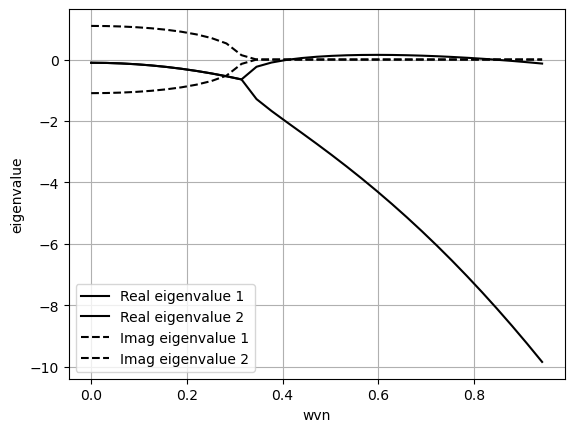

In [11]:
a = 0
b =1.1
diffusionConstants = [1,10]
Ustar = [a+b, b/(a+b)**2] 
top_dispersion = 30

eigenvalues = calculate_dispersion(PDE_jacobian, Ustar, diffusionConstants,  top_dispersion)
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, np.real(eigenvalues), c='k', label = ['Real eigenvalue 1', 'Real eigenvalue 2'])
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, np.imag(eigenvalues), c='k', linestyle='--', label = ['Imag eigenvalue 1', 'Imag eigenvalue 2'])
plt.grid()
plt.ylabel('eigenvalue')
plt.xlabel('wvn')
plt.legend()


# No Turing

The following dispersion relation is stable when diffusion is introduced.

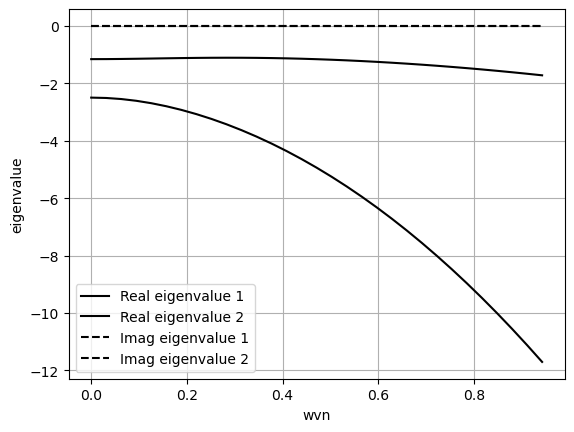

In [12]:
a = 1.5
b =0.2
diffusionConstants = [1,10]
Ustar = [a+b, b/(a+b)**2] 
top_dispersion = 30

eigenvalues = calculate_dispersion(PDE_jacobian, Ustar, diffusionConstants,  top_dispersion)
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, np.real(eigenvalues), c='k', label = ['Real eigenvalue 1', 'Real eigenvalue 2'])
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, np.imag(eigenvalues), c='k', linestyle='--', label = ['Imag eigenvalue 1', 'Imag eigenvalue 2'])
plt.grid()
plt.ylabel('eigenvalue')
plt.xlabel('wvn')
plt.legend()